In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=False)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LinearRegression
# Regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning, module="numpy")
warnings.filterwarnings("ignore", category=DeprecationWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")


---


In [55]:
df = pd.read_csv("Diamond.csv")

df.head()

,s,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [56]:
df.shape

(53940, 11)

In [57]:
df = df.drop(["s"], axis=1)

In [58]:
df = df.drop(["x","y",'z'], axis=1)
df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,Ideal,E,SI2,61.5,55.0,326
1,0.21,Premium,E,SI1,59.8,61.0,326
2,0.23,Good,E,VS1,56.9,65.0,327
3,0.29,Premium,I,VS2,62.4,58.0,334
4,0.31,Good,J,SI2,63.3,58.0,335


In [59]:
df["cut"] = df["cut"].map({"Ideal": 1, "Premium": 2, "Good": 3, "Very Good": 4, "Fair": 5})
df["color"] = df["color"].map({"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7})
df["clarity"] = df["clarity"].map({"IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "I1": 8})

df.head()

,carat,cut,color,clarity,depth,table,price
0,0.23,1,2,7,61.5,55.0,326
1,0.21,2,2,6,59.8,61.0,326
2,0.23,3,2,4,56.9,65.0,327
3,0.29,2,6,5,62.4,58.0,334
4,0.31,3,7,7,63.3,58.0,335


In [60]:
df.describe()

,carat,cut,color,clarity,depth,table,price
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,2.228940,3.594197,4.948980,61.749405,57.457184,3932.799722
std,0.474011,1.265976,1.701105,1.647136,1.432621,2.234491,3989.439738
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000
25%,0.400000,1.000000,2.000000,4.000000,61.000000,56.000000,950.000000
50%,0.700000,2.000000,4.000000,5.000000,61.800000,57.000000,2401.000000
75%,1.040000,4.000000,5.000000,6.000000,62.500000,59.000000,5324.250000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000


In [61]:
correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_target)

price      1.000000
carat      0.921591
color      0.172511
clarity    0.146800
table      0.127134
cut        0.049421
depth     -0.010647
Name: price, dtype: float64


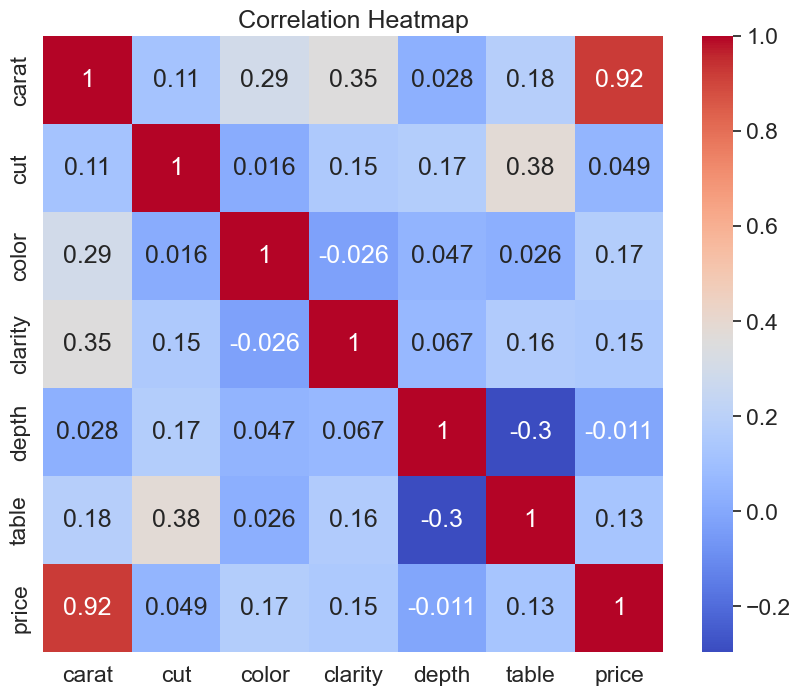

In [62]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [63]:
df = df.drop(["cut", "depth", "table"], axis=1)
df.head()

,carat,color,clarity,price
0,0.23,2,7,326
1,0.21,2,6,326
2,0.23,2,4,327
3,0.29,6,5,334
4,0.31,7,7,335


In [64]:
X = df.drop(["price"], axis=1)
y = df["price"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                test_size=0.2,
                                                random_state=42)

# Check the shape of the training dataset
print("Shape of training data - X_train:", X_train.shape)
print("Shape of training data - y_train:", y_train.shape)

Shape of training data - X_train: (43152, 3)
Shape of training data - y_train: (43152,)


---


In [65]:
# Collect all R2 scores
R2_scores = []
models = ['Linear Regression' , 'Lasso Regression', 'Ridge Regression' ,'Random Forest Regression' ,'KNeighbours Regression']

## Linear Regression


In [66]:
clf_lr = LinearRegression()
clf_lr.fit(X_train, y_train)

y_pred = clf_lr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 863.605
Mean Squared Error: 1565901.964
R-squared Score: 0.901


## Lasso Regression


In [67]:

clf_la = Lasso()
clf_la.fit(X_train , y_train)

y_pred = clf_la.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 863.145
Mean Squared Error: 1565764.547
R-squared Score: 0.902


## Ridge Regression


In [68]:
clf_rr = Ridge()
clf_rr.fit(X_train , y_train)

y_pred = clf_rr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 863.540
Mean Squared Error: 1565875.716
R-squared Score: 0.901


## Random Forest Regression


In [69]:
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train , y_train)

y_pred = clf_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 310.318
Mean Squared Error: 355128.986
R-squared Score: 0.978


## KNeighbours Regression


In [70]:
clf_knn = KNeighborsRegressor()
clf_knn.fit(X_train , y_train)

y_pred = clf_knn.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.3f" %mae)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: %.3f" %mse)

r2 = r2_score(y_test, y_pred)
print("R-squared Score: %.3f" %r2)

R2_scores.append(r2)

Mean Absolute Error: 333.433
Mean Squared Error: 390566.568
R-squared Score: 0.975


# Diamond Price Prediction


In [71]:
def predict_price(carat, color, clarity):
    # Map user inputs to the format used in the DataFrame
    color_mapping = {"D": 1, "E": 2, "F": 3, "G": 4, "H": 5, "I": 6, "J": 7}
    clarity_mapping = {"IF": 1, "VVS1": 2, "VVS2": 3, "VS1": 4, "VS2": 5, "SI1": 6, "SI2": 7, "I1": 8}

    # Create a DataFrame with user inputs
    user_data = pd.DataFrame({
        'carat': [carat],
        'color': [color_mapping[color]],
        'clarity': [clarity_mapping[clarity]]
    })

    # Use the trained model to predict the price
    predicted_price = clf_rf.predict(user_data)[0]

    return predicted_price


In [72]:
carat_input = 0.21
color_input = "D"
clarity_input = "VS1"
predicted_price = predict_price(carat_input, color_input, clarity_input)
print(f"The predicted price is: {predicted_price}")


The predicted price is: 384.68880341880345


In [73]:
import pickle

In [74]:
pickle.dump(clf_rf,open('diamond','wb'))

In [75]:
model_load=pickle.load(open('diamond','rb'))

In [76]:
model_load.predict(X_test)

array([ 525.46399603, 2375.05127786, 1102.2749207 , ...,  851.01322255,
       9608.30087414, 3663.32571429])

In [77]:
import pickle


with open('Diamond.pkl', 'wb') as file:
    pickle.dump(clf_rf, file)


In [78]:
import joblib

# Assuming you have X_train and y_train for training
clf_rf = RandomForestRegressor()
clf_rf.fit(X_train, y_train)

# Save the trained model to a file
joblib.dump(clf_rf, 'diamond_price_predictor_model.pkl')


['diamond_price_predictor_model.pkl']